In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [87]:
# i use this function for add all condition in my data
def wrangle(filepath):
    df = pd.read_excel(filepath)
    total_rows = len(df)
        #transcation not cancelled
    mask_not_cancel = df["InvoiceNo"].str[0] != 'C'
    df = df[mask_not_cancel]
    #drop cancel order 
    df=df[(df['UnitPrice']>0) & (df['Quantity']>0)]

    return df,total_rows

In [88]:
df,total_rows = wrangle("retail.xlsx")

print(total_rows)
print(len(df))


541909
530104


In [97]:
df.shape

(397884, 8)

In [89]:
print(f"Number of cancel orders = {total_rows - len(df) }" )

Number of cancel orders = 11805


In [92]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [94]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [95]:
df= df.dropna()
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [96]:
df.shape

(397884, 8)

In [98]:
#df["Country"].groupby()
df["Total_price"] = df["UnitPrice"]*df["Quantity"]
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [115]:
#we see here most country has relation in this store
most_10_country = df["Country"].value_counts().head(10).sort_values(ascending=False)
most_10_country

United Kingdom    333662
Germany             8228
France              7676
EIRE                6187
Spain               2315
Belgium             1938
Switzerland         1593
Portugal            1368
Norway               882
Italy                720
Name: Country, dtype: int64

Text(0, 0.5, 'Country')

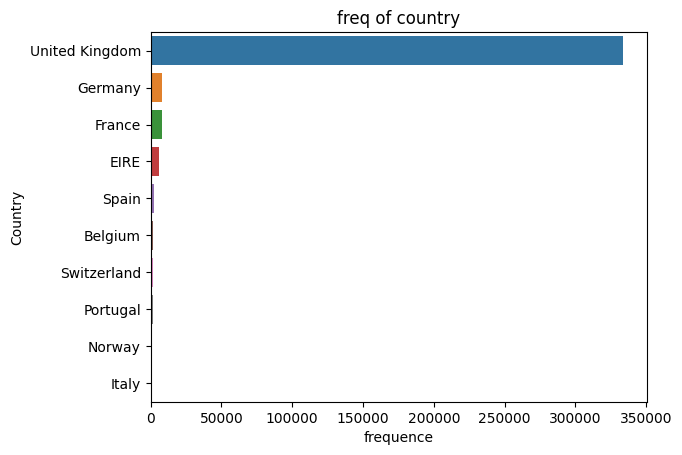

In [116]:
sns.barplot(x=most_10_country,y=most_10_country.index)
plt.title("freq of country")
plt.xlabel("frequence")
plt.ylabel("Country")

<AxesSubplot: >

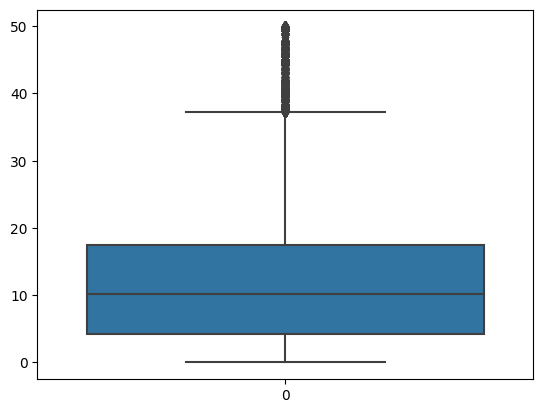

In [117]:
sns.boxplot(df["Total_price"])

In [118]:
mask_total = df["Total_price"] <50
df = df[mask_total]
df.shape

(370651, 9)

<AxesSubplot: >

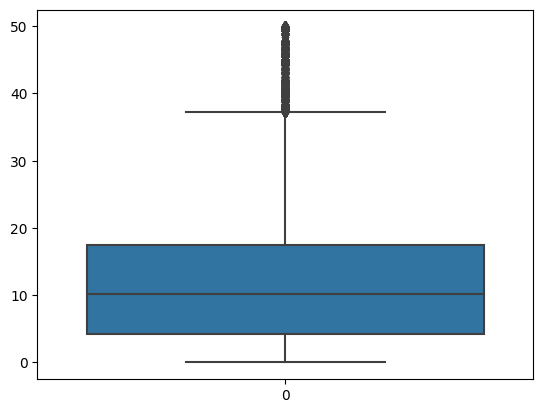

In [119]:
sns.boxplot(df["Total_price"])

In [120]:
high_country = df.groupby("Country")["Total_price"].mean().sort_values(ascending=False).head(10)
high_country

Country
Lithuania               30.915000
Czech Republic          28.168571
Lebanon                 24.521471
Singapore               23.701857
Bahrain                 23.560000
Brazil                  22.125600
Denmark                 21.854899
United Arab Emirates    20.549667
Norway                  20.193073
European Community      19.969298
Name: Total_price, dtype: float64

<AxesSubplot: xlabel='Total_price', ylabel='Country'>

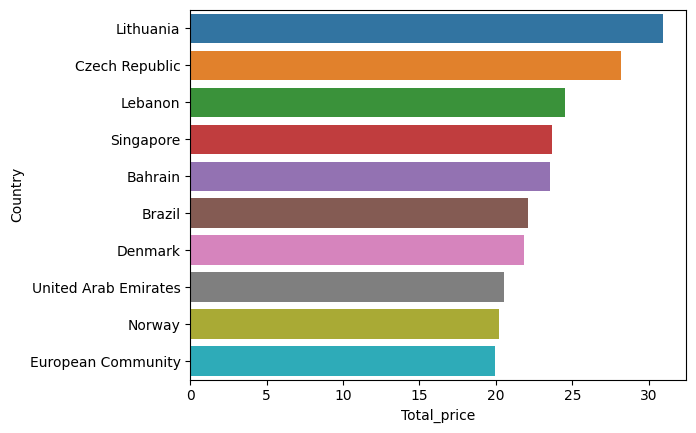

In [121]:
sns.barplot(x=high_country,y=high_country.index)
#we see here order of country has or spend money with this store

In [123]:
#we see here most product has relation in this store
most_10_product = df["Description"].value_counts().head(10).sort_values(ascending=False)
most_10_product

WHITE HANGING HEART T-LIGHT HOLDER    1605
JUMBO BAG RED RETROSPOT               1330
LUNCH BAG RED RETROSPOT               1238
ASSORTED COLOUR BIRD ORNAMENT         1160
PARTY BUNTING                         1120
SET OF 3 CAKE TINS PANTRY DESIGN      1068
LUNCH BAG  BLACK SKULL.               1067
REGENCY CAKESTAND 3 TIER              1055
PACK OF 72 RETROSPOT CAKE CASES        995
LUNCH BAG SPACEBOY DESIGN              983
Name: Description, dtype: int64

Text(0, 0.5, 'Product')

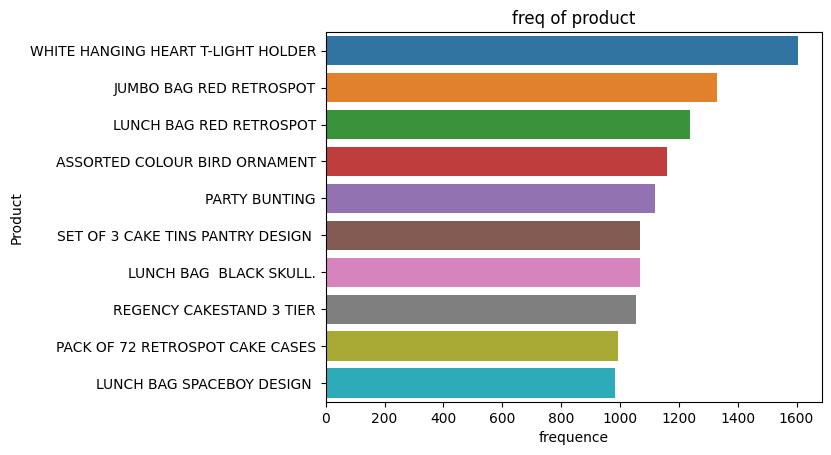

In [125]:
sns.barplot(x=most_10_product,y=most_10_product.index)
plt.title("freq of product")
plt.xlabel("frequence")
plt.ylabel("Product")

In [122]:
high_product = df.groupby("Description")["Total_price"].mean().sort_values(ascending=False).head(10)
high_product

Description
HALL CABINET WITH 3 DRAWERS         49.95
CINDERELLA CHANDELIER               49.95
VINTAGE PINK DECORATIVE PARASOL     47.40
BLUE MONTE CARLO HANDBAG            46.80
PINK SMALL GLASS CAKE STAND         46.80
MISELTOE HEART WREATH WHITE         41.50
DANISH ROSE BEDSIDE CABINET         39.95
MEDINA STAMPED METAL STOOL          39.95
SET/4 WHITE RETRO STORAGE CUBES     39.95
FUSCHIA RETRO BAR STOOL             39.95
Name: Total_price, dtype: float64

<AxesSubplot: xlabel='Total_price', ylabel='Description'>

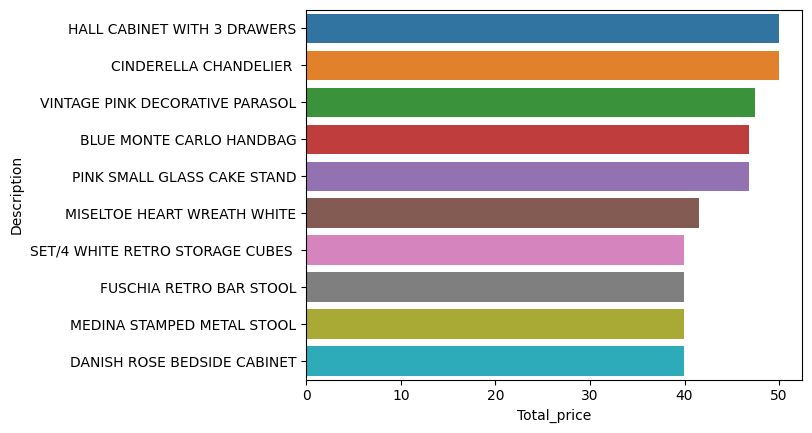

In [69]:
sns.barplot(x=high_product,y=high_product.index)
#so product more wants by clients and we see product  "PAPER CRAFT , LITTLE BIRDIE " has percent very important 

In [126]:
high_product_date = df.groupby(["InvoiceDate","Country"])["Total_price"].mean().sort_values(ascending=False).head(20)
high_product_date
#that give us idee about months and sales for every country

InvoiceDate          Country       
2011-05-12 10:10:00  Netherlands       49.92
2011-09-14 10:40:00  United Kingdom    49.92
2011-06-16 10:04:00  United Kingdom    49.92
2011-07-14 10:09:00  United Kingdom    49.92
2011-07-24 13:11:00  United Kingdom    49.80
2011-06-16 14:46:00  Germany           49.80
2011-11-24 15:28:00  United Kingdom    49.80
2011-01-14 12:21:00  United Kingdom    49.50
2011-05-26 10:12:00  United Kingdom    49.50
2011-07-12 09:11:00  United Kingdom    49.50
2011-06-08 13:15:00  United Kingdom    49.50
2011-11-14 14:17:00  Portugal          49.50
2011-11-16 14:26:00  United Kingdom    49.50
2011-11-14 13:10:00  United Kingdom    49.50
2011-10-27 16:34:00  United Kingdom    49.50
2011-09-04 13:20:00  United Kingdom    49.50
2011-03-16 10:25:00  United Kingdom    49.50
2011-07-19 15:30:00  United Kingdom    49.47
2011-10-27 14:56:00  United Kingdom    49.05
2011-09-06 10:12:00  United Kingdom    49.05
Name: Total_price, dtype: float64

In [127]:
#CustomerID
high_customer_id = df.groupby(["CustomerID","Country"])["Total_price"].mean().sort_values(ascending=False).head(20)
high_customer_id
#we see here important customer from 'United Kingdom'

CustomerID  Country       
18184.0     United Kingdom    49.80000
12875.0     United Kingdom    49.47000
12736.0     France            46.80000
14411.0     United Kingdom    45.00000
15691.0     United Kingdom    45.00000
17330.0     United Kingdom    44.90000
12891.0     United Kingdom    42.00000
13739.0     United Kingdom    41.70000
12590.0     Germany           41.70000
14477.0     United Kingdom    41.60000
15251.0     United Kingdom    40.94625
15769.0     United Kingdom    40.68000
13967.0     United Kingdom    40.35000
16989.0     United Kingdom    40.01250
12814.0     Poland            40.00000
13631.0     United Kingdom    40.00000
13538.0     United Kingdom    39.95000
13811.0     Germany           39.93750
12394.0     Denmark           39.84000
14195.0     United Kingdom    39.80000
Name: Total_price, dtype: float64

In [128]:
# Calculate Recency, Frequency, and Monetary values
today_date = pd.to_datetime('2011-12-09')
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days,
    'InvoiceNo': 'count',
    "Total_price": 'sum'
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Print the RFM table
rfm.head()
rfm.shape

(4200, 3)

In [129]:
#split data
X = rfm
print("X shape:", X.shape)
X.head()

X shape: (4200, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,172,3354.98
12348.0,74,19,601.64
12349.0,17,70,1334.35
12350.0,309,17,334.40
12352.0,35,80,1505.74


In [130]:
n_cluster = range(2,13)
inertia_errors = []
silhouette_scores = []

for k in n_cluster:
    model = make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42))
    model.fit(X)
    

    inertia_errors.append(model.named_steps["kmeans"].inertia_)
 #   silhoutte_scores.append(silhouette_score(X,model.named_steps["kmeans"].labels_))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)




/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: Future

inertia_errors len: 11
Inertia: [8324.221805597086, 4778.22082998449, 3132.4496731041418, 2587.9254932069225, 2124.049674972964, 1679.3689372338529, 1388.0109112095004, 1231.0848385986033, 1095.4641314052205, 965.0199397164055, 861.3769697600682]


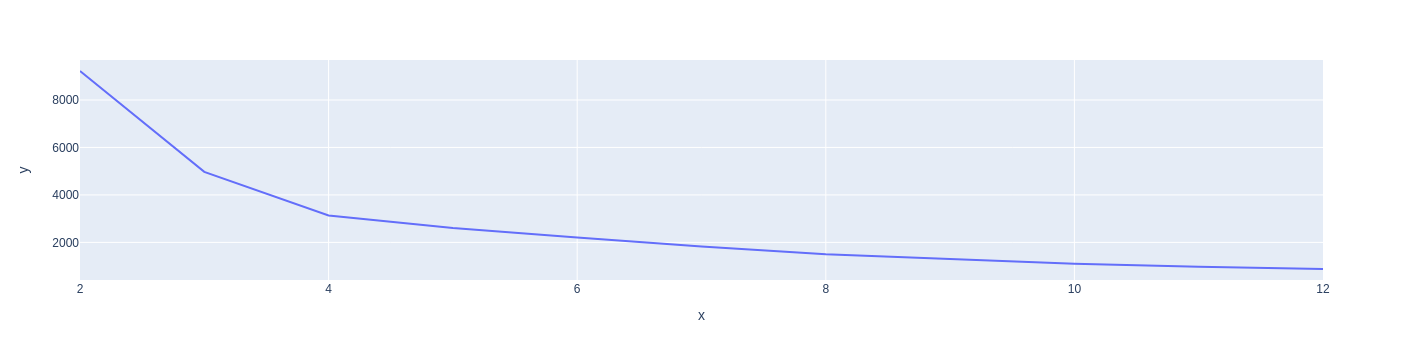

In [74]:
#we see depandant between inertia_errors and n_clustter
px.line(x = n_cluster,
       y = inertia_errors)

In [131]:
#final model by number cluster 5
final_model = make_pipeline(StandardScaler(),KMeans(n_clusters=4,random_state=42))
final_model.fit(X)

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [132]:
labels = final_model.named_steps["kmeans"].labels_
labels

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



            Recency    Frequency      Monetary
Cluster                                       
0         43.437102    65.004947    843.137757
1        246.601744    27.347868    343.267423
2         14.658683   407.056886   4917.482635
3          0.500000  5626.750000  49984.922500


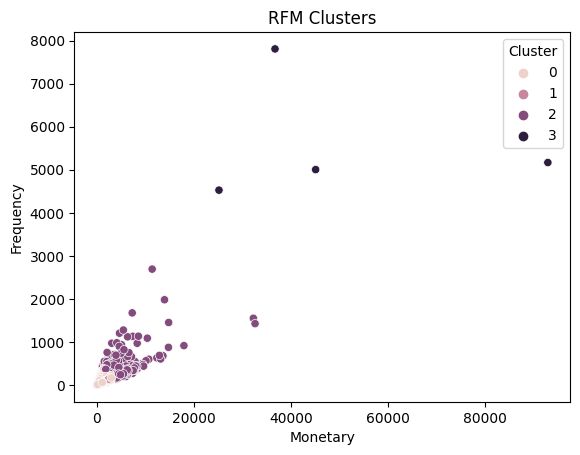

In [143]:
rfm['Cluster'] = final_model.fit_predict(X)

# Print the resulting clusters
print(rfm.groupby('Cluster').mean())
# Visualize clusters
sns.scatterplot(y='Frequency', x='Monetary', hue='Cluster', data=rfm)
plt.title('RFM Clusters')
plt.show()

In [136]:
# Instantiate transformer
pca = PCA(n_components =2,random_state = 42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1","PC2"])

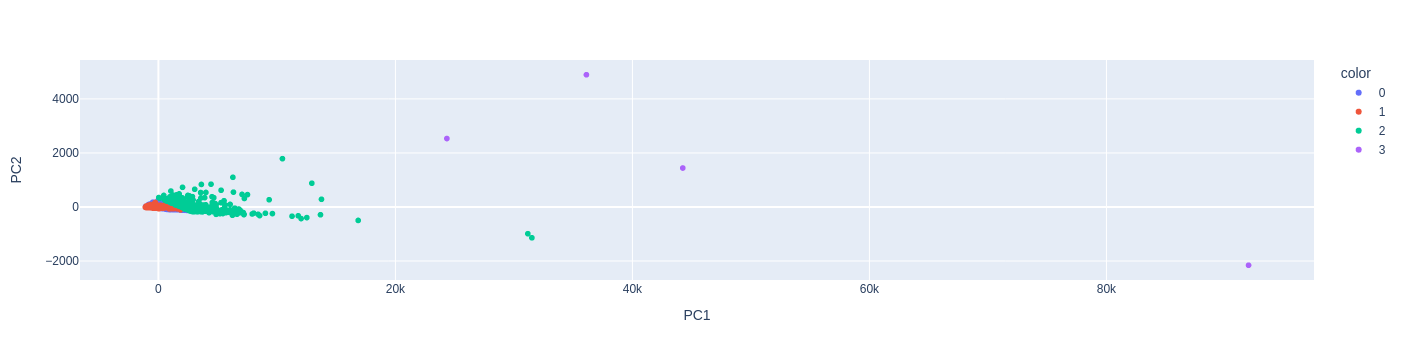

In [140]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame=X_pca,
    x="PC1",
    y="PC2",
    color = labels.astype(str))

fig.show()